In [1]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import skimage.color
import skimage.io
import skimage as ski
from tqdm.notebook import tqdm

# read in a set of images from a directory

path = 'image_detector/images/'
size = 20

train_images = []
test_images = []

for i in tqdm(range(20)):
    train_image = skimage.io.imread(fname=path + f'Image_{i}.jpg')
    train_images.append(train_image)


  0%|          | 0/20 [00:00<?, ?it/s]

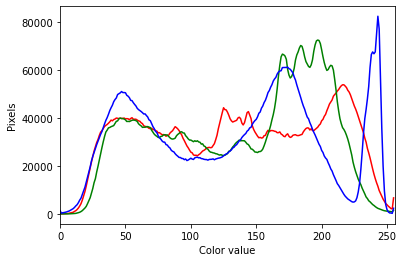

In [5]:
# create a histogram of the image color for any image by index

img_no = 4;

# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        train_images[img_no][:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

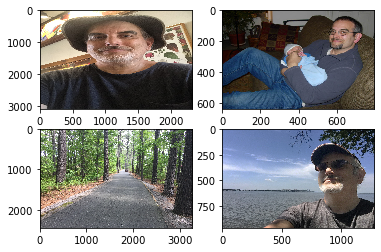

<Figure size 432x288 with 0 Axes>

In [4]:
# verify that we can use the images with matplotlib

for i in range(4):
    plt.subplot(220 + 1 + i)
    plt.imshow(np.uint8(train_images[i]), interpolation = 'nearest', aspect='auto')
plt.show()
plt.savefig('train_images.png')

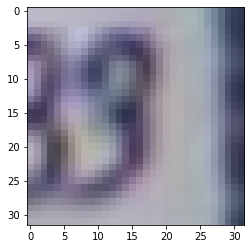

[3]


In [11]:
# investigate the Google house numbers training dataset

import scipy.io

# load our dataset
train_data = scipy.io.loadmat('image_detector/test_32x32.mat')
# extract the images and labels from the dictionary object
X = train_data['X']
y = train_data['y']
# view an image (e.g. 25) and print its corresponding label
img_index = 10
plt.imshow(X[:,:,:,img_index])
plt.show()
print(y[img_index])

In [12]:
# Follow the Stanford Tutorial at:
# https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/

from sklearn.utils import shuffle

X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2],X.shape[3]).T
y = y.reshape(y.shape[0],)
X, y = shuffle(X, y, random_state=42)
print(X)

[[ 78  80 137 ...  48  50  63]
 [155 109  96 ... 160 122 113]
 [ 83  65  49 ...  43  45  60]
 ...
 [ 22  22  31 ...  30  31  45]
 [155 155 145 ...  36  44  65]
 [ 24  10  20 ...  48  40  51]]


In [7]:
# Perform our first machine learning attempt

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
print(clf)

RandomForestClassifier()


In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
# Get an accuracy predictor

from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.6696754369118494


In [9]:
# Create a series of image using the PIL package and a random generation process

from PIL import Image
import random

img_array = []
img_data = []
X = []
Y = []

# creating image objects
for i in range(1000):
    img_data = []
    im = Image.open("image_detector/images/black_background.png")
    px = im.load()
    num_objects = random.randint(0, 10)
    for j in range(num_objects):
        x = random.randint(3, 60)
        y = random.randint(3, 60)
        px[x, y] = (255, 255, 0)
        px[x+1, y] = (255, 255, 0)
        px[x, y+1] = (255, 255, 0)
        px[x+1, y+1] = (255, 255, 0)
        px[x-1, y-1] = (128, 128, 0)
        px[x-1, y] = (128, 128, 0)
        px[x-1, y+1] = (128, 128, 0)
        px[x-1, y+2] = (128, 128, 0)
        px[x+2, y-1] = (128, 128, 0)
        px[x+2, y] = (128, 128, 0)
        px[x+2, y+1] = (128, 128, 0)
        px[x+2, y+2] = (128, 128, 0)
        px[x, y+2] = (128, 128, 0)
        px[x, y-1] = (128, 128, 0)
        px[x+1, y+2] = (128, 128, 0)
        px[x+1, y-1] = (128, 128, 0)
        #print (px[x, y])
    for a in range(0, 64):
        row_data = []
        for b in range(0, 64):
            row_data.append(px[a,b][0])
        img_data.append(row_data)
    X.append(img_data)
    Y.append(str(num_objects))
    img_array.append(im)
    #display(im)

In [10]:
# Import images from the PIL package

from PIL import Image
import random

img_array = []
img_data = []
X = []
Y = []

# Persons to use for generation are at:
# image_detector/images/Person_X.png

p = [Image.open("image_detector/images/Person_0.png"),
     Image.open("image_detector/images/Person_1.png"),
     Image.open("image_detector/images/Person_2.png"),
     Image.open("image_detector/images/Person_3.png"),
     Image.open("image_detector/images/Person_4.png"),
     Image.open("image_detector/images/Person_5.png")]

# creating image objects
for i in range(5000):
    img_data = []
    random.shuffle(p)
    im = Image.open("image_detector/images/black_background_256.png")
    px = im.load()
    num_objects = random.randint(0, 5)
    for j in range(num_objects):
        x_loc = random.randint(-40, 60)
        if(j%2==1):
            x_loc = random.randint(100, 180)
        if(j>3):
            im.paste(p[j], (x_loc, random.randint(150, 190)), p[j])
        elif(j>1):
            im.paste(p[j], (x_loc, random.randint(90, 130)), p[j])
        else:
            im.paste(p[j], (x_loc, random.randint(0, 40)), p[j])
    for a in range(0, 256):
        row_data = []
        for b in range(0, 256):
            row_data.append(px[b,a][0])
        img_data.append(row_data)
    X.append(img_data)
    Y.append(str(num_objects))
    img_array.append(im)
    #display(im)

50


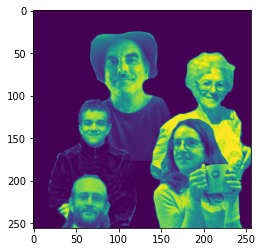

['1', '0', '1', '4', '2', '2', '0', '4', '2', '4', '2', '5', '1', '3', '0', '3', '4', '5', '1', '0', '1', '5', '0', '3', '1', '4', '3', '4', '2', '1', '1', '2', '0', '3', '4', '4', '4', '4', '0', '1', '2', '1', '0', '0', '3', '1', '2', '2', '2', '4']


In [8]:
print(len(X))

plt.imshow(X[17])
#plt.imshow(img_array[17])
plt.show()

print(Y)

img_array[17].save("temp.png", format="PNG")

#print(X)

In [161]:
from sklearn.utils import shuffle

# compress X to two dimensions:
Z = []
for i in range(len(X)):
    img_data = []
    for a in range(0, 256):        
        for b in range(0, 256):
            img_data.append(X[i][b][a])
    Z.append(img_data)
X = Z
# shuffle the images:
X, y = shuffle(X, Y, random_state=42)

In [156]:
# Now try our data set with a machine learning example

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()
print(clf)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier()


RandomForestClassifier()

In [157]:
from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.9


In [4]:

samples = [50, 100, 200, 300, 500, 1000]
results = [0.60, 0.90, 0.90, 0.73, 0.88, 0.86]

plt.plot(samples, results)


3


In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

print("Naive Bays' Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Naive Bays' Accuracy is:  65.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.50      0.67         2
           2       1.00      0.50      0.67         6
           3       0.00      0.00      0.00         0
           4       0.33      1.00      0.50         2
           5       0.67      0.40      0.50         5

    accuracy                           0.65        20
   macro avg       0.67      0.57      0.56        20
weighted avg       0.85      0.65      0.69        20



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  85.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       0.86      1.00      0.92         6
           4       0.00      0.00      0.00         2
           5       0.80      0.80      0.80         5

    accuracy                           0.85        20
   macro avg       0.73      0.76      0.74        20
weighted avg       0.81      0.85      0.83        20



In [164]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("SVM's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  35.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           4       0.13      1.00      0.24         2
           5       0.00      0.00      0.00         5

    accuracy                           0.35        20
   macro avg       0.23      0.40      0.25        20
weighted avg       0.26      0.35      0.27        20



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
# Install cv2 as a powerful computer vision package

pip install opencv-python

import cv2

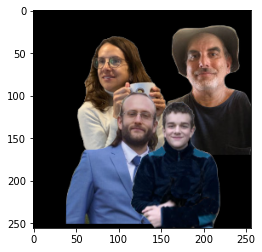

In [191]:
# Verify that our image array is still accessible

plt.imshow(img_array[0])

In [ ]:
# Investigate cv2 as a powerful computer vision package

import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly

img_array[0].save("temp.png", format="PNG")
image = cv2.imread("temp.png")
box, label, count = cv.detect_common_objects(image)
output = draw_bbox(image, box, label, count)
plt.imshow(output)
plt.show()
print("Number of people in this image are " +str(label.count('person')))

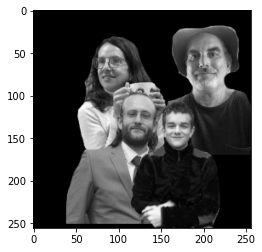

In [173]:
#grab image from generated img_array (by index)

img_array[0].save("temp.png", format="PNG")
image = cv2.imread("temp.png")

#image = cv2.imread('image_detector/images/coin3.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

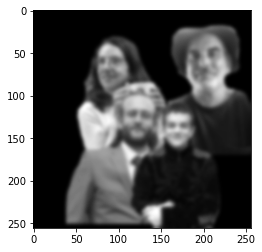

In [174]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

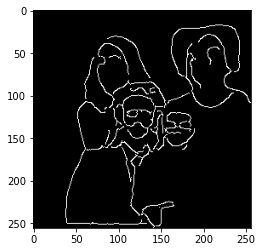

In [175]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

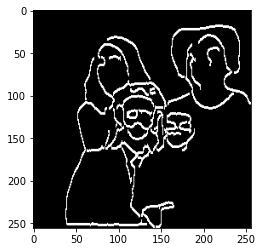

In [176]:
dilated = cv2.dilate(canny, (1,1), iterations=2)
plt.imshow(dilated, cmap='gray')

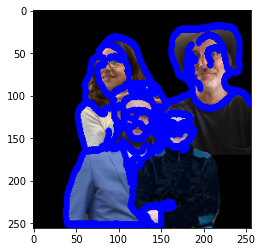

In [177]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1,(0, 0, 255),5)
 
plt.imshow(rgb)

In [11]:
print("people in the image : ", len(cnt))

people in the image :  21


In [ ]:
# Install a powerful computational N-degrees processing engine

pip install -U numpy

In [ ]:
# Test out similar cvlib services for object counting

import cvlib as cv
from cvlib.object_detection import draw_bbox
from numpy.lib.polynomial import poly

img = cv2.imread('temp.png')
#img = cv2.imread('image_detector/images/image1.png')
#img = cv2.imread('image_detector/images/coin2.jpg')

img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img1)
plt.show()

In [ ]:
box, label, count = cv.detect_common_objects(img)
output = draw_bbox(img, box, label, count)

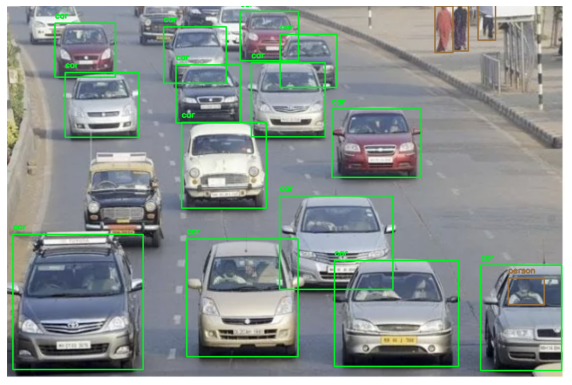

In [8]:
output = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(output)
plt.show()

In [9]:
print("Number of objects in this image are " +str(len(label)))

Number of objects in this image are 18
